<a href="https://colab.research.google.com/github/HemaKumar21/MilkyMistproductdeduction/blob/main/MilkyMistproductdeduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install ultralytics


In [6]:
from ultralytics import YOLO
import cv2
import numpy as np
import time
import torch
import PIL.Image
import base64
import io
from google.colab.output import eval_js
import IPython.display as display

In [4]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")  # use pretrained model

model.train(
    data="/content/drive/MyDrive/milkymist product.v3i.yolov12/data.yaml",   # your dataset file
    epochs=100,
    imgsz=640,
    batch=1,                     # important for small dataset
    device=0,
    patience=20,
    pretrained=True,

    # ✅ AUGMENTATION SETTINGS
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10.0,
    translate=0.1,
    scale=0.5,
    shear=2.0,
    flipud=0.5,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2
)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/milkymist product.v3i.yolov12/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, per

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ed4c012ff20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

# New section

In [7]:
!ls /content/runs/detect

train  train2


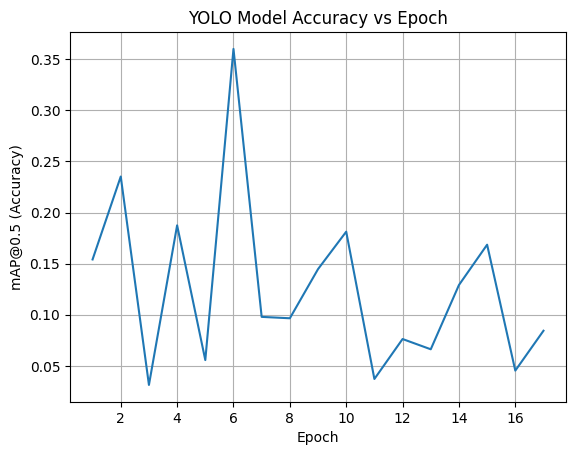

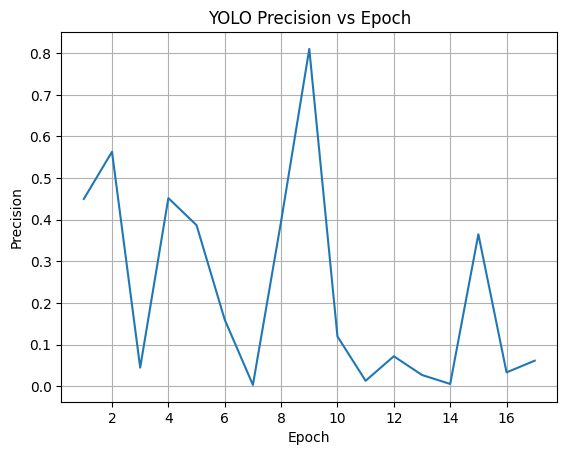

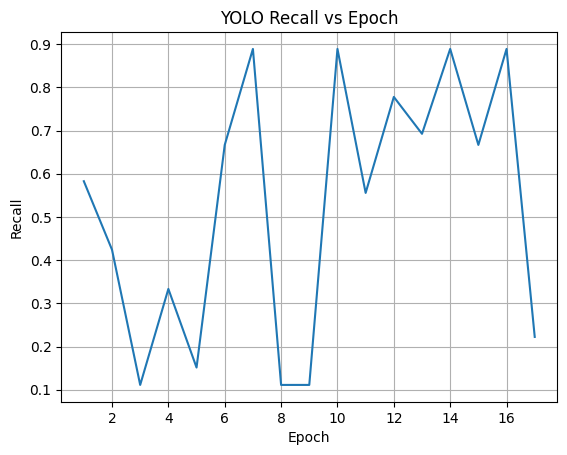

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load YOLO training results
results_path = "/content/runs/detect/train/results.csv"  # change if needed
df = pd.read_csv(results_path)

# Strip column spaces (YOLO bug fix)
df.columns = [c.strip() for c in df.columns]

# ✅ Plot mAP vs Epoch
plt.figure()
plt.plot(df["epoch"], df["metrics/mAP50(B)"])
plt.xlabel("Epoch")
plt.ylabel("mAP@0.5 (Accuracy)")
plt.title("YOLO Model Accuracy vs Epoch")
plt.grid()
plt.show()

# ✅ Plot Precision vs Epoch
plt.figure()
plt.plot(df["epoch"], df["metrics/precision(B)"])
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.title("YOLO Precision vs Epoch")
plt.grid()
plt.show()

# ✅ Plot Recall vs Epoch
plt.figure()
plt.plot(df["epoch"], df["metrics/recall(B)"])
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.title("YOLO Recall vs Epoch")
plt.grid()
plt.show()


In [9]:
dummy = np.zeros((640, 640, 3), dtype=np.uint8)
_ = model.predict(dummy)

print("Model ready.")


0: 640x640 2 milkshakes, 19.0ms
Speed: 2.7ms preprocess, 19.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Model ready.


In [10]:
import numpy as np
import cv2
from google.colab.output import eval_js
import PIL.Image
import IPython.display
import time
import base64
import io

In [11]:
def capture_frame():
    js = """
    async function captureFrame() {
      const video = document.createElement('video');
      const stream = await navigator.mediaDevices.getUserMedia({ video: true });

      video.srcObject = stream;
      await video.play();

      // wait for video readiness
      await new Promise((resolve) => setTimeout(resolve, 200));

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;

      const ctx = canvas.getContext('2d');
      ctx.drawImage(video, 0, 0);

      stream.getTracks()[0].stop();
      return canvas.toDataURL('image/jpeg', 0.8);
    }
    captureFrame();
    """
    data = eval_js(js)
    img_bytes = base64.b64decode(data.split(',')[1])
    img = PIL.Image.open(io.BytesIO(img_bytes))
    return np.array(img)

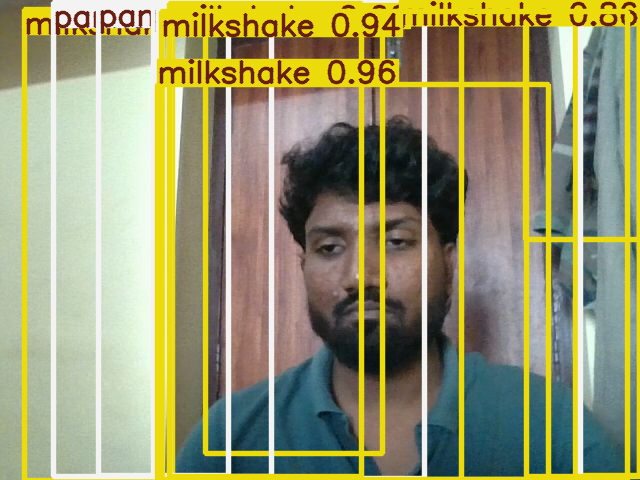

KeyboardInterrupt: 

In [15]:
import IPython.display as display
import base64
import io
import PIL.Image
import numpy as np
from google.colab.output import eval_js
import time

def capture_frame():
    js = """
    async function captureFrame() {
      const video = document.createElement('video');
      const stream = await navigator.mediaDevices.getUserMedia({ video: true });

      video.srcObject = stream;
      await video.play();

      // wait for video readiness
      await new Promise((resolve) => setTimeout(resolve, 200));

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;

      const ctx = canvas.getContext('2d');
      ctx.drawImage(video, 0, 0);

      stream.getTracks()[0].stop();
      return canvas.toDataURL('image/jpeg', 0.8);
    }
    captureFrame();
    """
    data = eval_js(js)
    img_bytes = base64.b64decode(data.split(',')[1])
    img = PIL.Image.open(io.BytesIO(img_bytes))
    return np.array(img)

print("Starting live detection... Press STOP button in Colab to end.")

while True:
    # 1. Capture webcam frame from browser
    frame = capture_frame()

    # 2. Run YOLO inference
    results = model(frame, verbose=False)

    # 3. Draw bounding boxes with improved visibility
    annotated = results[0].plot(line_width=3, font_size=12)

    # 4. Display the frame
    display.clear_output(wait=True)
    display.display(PIL.Image.fromarray(annotated))

    # 5. Slow down loop (Colab limitation)
    time.sleep(0.05)

# Task
Modify the `while True` loop to extract bounding box coordinates, class names, and confidence scores from the YOLO results, then use OpenCV (`cv2`) functions to manually draw the bounding boxes and text labels on the `frame` to ensure better visibility. Verify the detected products are clearly visible in the live stream.

## Modify Live Detection for Manual Drawing

### Subtask:
Adjust the `while True` loop to extract bounding box coordinates, class names, and confidence scores from the YOLO results. Then, use OpenCV (`cv2`) functions to manually draw the bounding boxes and text labels on the `frame` to ensure better visibility.


**Reasoning**:
The subtask requires modifying the live detection loop to manually draw bounding boxes and labels using OpenCV functions, ensuring better visibility and customizing the drawing process. This involves iterating through detected objects, extracting their properties, and then using `cv2.rectangle` and `cv2.putText` to draw on the frame.



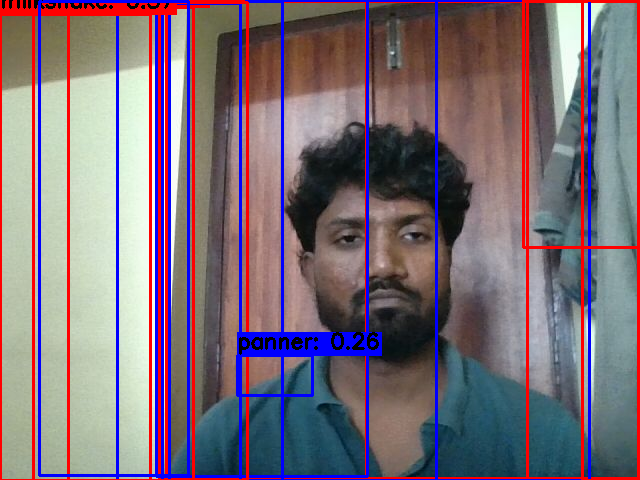

KeyboardInterrupt: 

In [16]:
import IPython.display as display
import base64
import io
import PIL.Image
import numpy as np
from google.colab.output import eval_js
import time
import cv2 # Ensure OpenCV is imported for drawing functions

def capture_frame():
    js = """
    async function captureFrame() {
      const video = document.createElement('video');
      const stream = await navigator.mediaDevices.getUserMedia({ video: true });

      video.srcObject = stream;
      await video.play();

      // wait for video readiness
      await new Promise((resolve) => setTimeout(resolve, 200));

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;

      const ctx = canvas.getContext('2d');
      ctx.drawImage(video, 0, 0);

      stream.getTracks()[0].stop();
      return canvas.toDataURL('image/jpeg', 0.8);
    }
    captureFrame();
    """
    data = eval_js(js)
    img_bytes = base64.b64decode(data.split(',')[1])
    img = PIL.Image.open(io.BytesIO(img_bytes))
    return np.array(img)

print("Starting live detection... Press STOP button in Colab to end.")

# Define colors for classes (BGR format)
# You might want to retrieve the class names from model.names dynamically
class_colors = {
    0: (0, 255, 0),   # Green for class 0
    1: (255, 0, 0),   # Red for class 1
    2: (0, 0, 255)    # Blue for class 2
    # Add more colors if you have more classes
}

while True:
    # 1. Capture webcam frame from browser
    frame = capture_frame()

    # 2. Run YOLO inference
    results = model(frame, verbose=False)

    # 3. Manually draw bounding boxes and labels
    if results[0].boxes is not None:
        for *xyxy, conf, cls in results[0].boxes.data:
            x1, y1, x2, y2 = map(int, xyxy)
            class_id = int(cls)
            confidence = float(conf)

            # Get class name
            class_name = model.names[class_id]

            # Get color for the class, default to white if not defined
            color = class_colors.get(class_id, (255, 255, 255)) # White default

            # Draw bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)

            # Prepare text label
            label = f'{class_name}: {confidence:.2f}'

            # Calculate text size for background rectangle
            (label_width, label_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)

            # Draw filled rectangle for text background
            cv2.rectangle(frame, (x1, y1 - label_height - baseline), (x1 + label_width, y1), color, -1)

            # Draw text label
            cv2.putText(frame, label, (x1, y1 - baseline), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)

    # 4. Display the frame
    display.clear_output(wait=True)
    display.display(PIL.Image.fromarray(frame))

    # 5. Slow down loop (Colab limitation)
    time.sleep(0.05)